In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rounakbanik/the-movies-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Manali Parikh\.cache\kagglehub\datasets\rounakbanik\the-movies-dataset\versions\7


In [2]:
#Q2 a

import os
import pandas as pd

# Path to the dataset
dataset_path = r"C:\Users\Manali Parikh\.cache\kagglehub\datasets\rounakbanik\the-movies-dataset\versions\7"

# Path to the ratings_small.csv file
ratings_file = os.path.join(dataset_path, "ratings_small.csv")

# Read the ratings data
ratings_df = pd.read_csv(ratings_file)

# Display information about the DataFrame
print("First 5 rows of the ratings_small.csv file:")
print(ratings_df.head())

First 5 rows of the ratings_small.csv file:
   userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205


In [3]:
print("\nDataFrame information:")
print(ratings_df.info())


DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


In [4]:
print("\nSummary statistics:")
print(ratings_df.describe())


Summary statistics:
              userId        movieId         rating     timestamp
count  100004.000000  100004.000000  100004.000000  1.000040e+05
mean      347.011310   12548.664363       3.543608  1.129639e+09
std       195.163838   26369.198969       1.058064  1.916858e+08
min         1.000000       1.000000       0.500000  7.896520e+08
25%       182.000000    1028.000000       3.000000  9.658478e+08
50%       367.000000    2406.500000       4.000000  1.110422e+09
75%       520.000000    5418.000000       4.000000  1.296192e+09
max       671.000000  163949.000000       5.000000  1.476641e+09


In [5]:
# Confirm columns match expected format
print("\nColumn names:", ratings_df.columns.tolist())

# Check if the data format matches 'userID movieID rating timestamp'
expected_columns = ['userId', 'movieId', 'rating', 'timestamp']
actual_columns = ratings_df.columns.tolist()

if set(expected_columns).issubset(set(actual_columns)):
    print("\nThe file contains the expected columns: 'userId', 'movieId', 'rating', 'timestamp'")
else:
    print("\nWarning: The file columns don't exactly match the expected format")
    print(f"Expected: {expected_columns}")
    print(f"Actual: {actual_columns}")


Column names: ['userId', 'movieId', 'rating', 'timestamp']

The file contains the expected columns: 'userId', 'movieId', 'rating', 'timestamp'


In [6]:
#Q2 b

# Evaluation metrics used:
# MAE: Mean Absolute Error
# RMSE: Root Mean Square Error

# These will be automatically computed using Surprise's cross_validate function.
# MAE measures the average absolute difference between predicted and actual ratings.
# RMSE penalizes larger errors more by squaring the differences before averaging.


In [7]:
#Q2 c

from surprise import Dataset, Reader, KNNBasic, SVD
from surprise.model_selection import cross_validate

# Define a Surprise Reader and load data from pandas DataFrame
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

# Define the 3 models
models = {
    "User-based CF": KNNBasic(sim_options={'user_based': True}),
    "Item-based CF": KNNBasic(sim_options={'user_based': False}),
    "PMF (SVD)": SVD()
}

# Evaluate all models with 5-fold cross-validation
results = {}
for name, model in models.items():
    print(f"Evaluating {name}...")
    cv_result = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    results[name] = {
        'RMSE': round(cv_result['test_rmse'].mean(), 4),
        'MAE': round(cv_result['test_mae'].mean(), 4)
    }


Evaluating User-based CF...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9739  0.9738  0.9575  0.9669  0.9755  0.9695  0.0067  
MAE (testset)     0.7491  0.7494  0.7351  0.7438  0.7478  0.7451  0.0054  
Fit time          0.19    0.50    0.49    0.48    0.47    0.42    0.12    
Test time         1.17    2.84    3.07    2.93    3.09    2.62    0.73    
Evaluating Item-based CF...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.

In [8]:
#Q2 d

# Display RMSE and MAE for all models
for name, scores in results.items():
    print(f"{name}: RMSE = {scores['RMSE']}, MAE = {scores['MAE']}")

# Summary:
# Best model = one with lowest RMSE and MAE (likely PMF/SVD)


User-based CF: RMSE = 0.9695, MAE = 0.7451
Item-based CF: RMSE = 0.9345, MAE = 0.7209
PMF (SVD): RMSE = 0.8976, MAE = 0.691


In [9]:
#Q2 e

from surprise import KNNBasic
from surprise.model_selection import cross_validate

import matplotlib.pyplot as plt

# Similarity options and model types
similarities = ['cosine', 'msd', 'pearson']
model_types = ['user', 'item']

# Store results
similarity_results = {
    'User-based': {},
    'Item-based': {}
}

# Evaluate for each model type and similarity
for sim in similarities:
    for model_type in model_types:
        is_user_based = (model_type == 'user')
        model = KNNBasic(sim_options={'name': sim, 'user_based': is_user_based})
        cv = cross_validate(model, data, measures=['RMSE'], cv=5, verbose=False)
        key = 'User-based' if is_user_based else 'Item-based'
        similarity_results[key][sim] = round(cv['test_rmse'].mean(), 4)

# Print results
print("RMSE by Similarity Metric:")
for model_type in similarity_results:
    print(f"\n{model_type} CF:")
    for sim in similarities:
        print(f"  {sim.capitalize()}: RMSE = {similarity_results[model_type][sim]}")


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd sim

In [10]:
#Q2 f

k_values = list(range(10, 110, 10))  # 10 to 100 in steps of 10
rmse_by_k = {
    'User-based': [],
    'Item-based': []
}

from surprise import KNNBasic

for k in k_values:
    # User-based CF with MSD
    user_cf = KNNBasic(k=k, sim_options={'name': 'msd', 'user_based': True})
    user_cv = cross_validate(user_cf, data, measures=['RMSE'], cv=5, verbose=False)
    rmse_by_k['User-based'].append(round(user_cv['test_rmse'].mean(), 4))

    # Item-based CF with MSD
    item_cf = KNNBasic(k=k, sim_options={'name': 'msd', 'user_based': False})
    item_cv = cross_validate(item_cf, data, measures=['RMSE'], cv=5, verbose=False)
    rmse_by_k['Item-based'].append(round(item_cv['test_rmse'].mean(), 4))


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

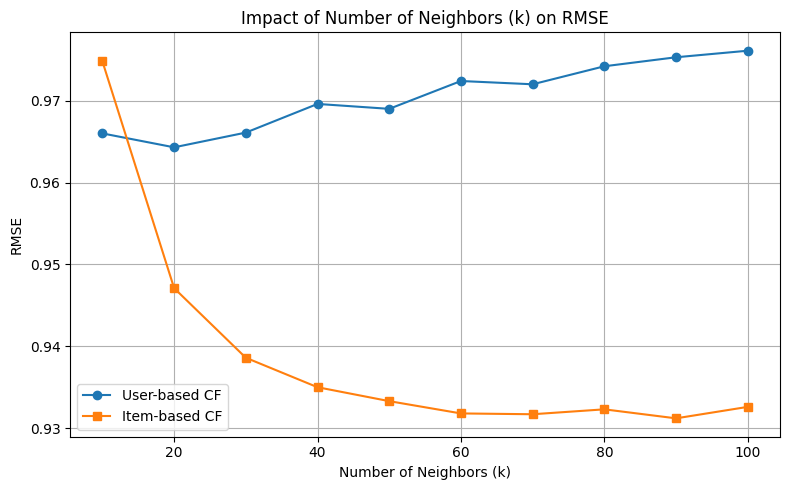

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(k_values, rmse_by_k['User-based'], marker='o', label='User-based CF')
plt.plot(k_values, rmse_by_k['Item-based'], marker='s', label='Item-based CF')

plt.title("Impact of Number of Neighbors (k) on RMSE")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [14]:
import numpy as np

# Extract RMSE lists from your existing dictionary
rmses_user = rmse_by_k['User-based']
rmses_item = rmse_by_k['Item-based']

# Best k calculation
best_k_user = k_values[np.argmin(rmses_user)]
best_rmse_user = min(rmses_user)

best_k_item = k_values[np.argmin(rmses_item)]
best_rmse_item = min(rmses_item)

print(f"Best k for User-based CF: {best_k_user} with RMSE: {best_rmse_user}")
print(f"Best k for Item-based CF: {best_k_item} with RMSE: {best_rmse_item}")


Best k for User-based CF: 20 with RMSE: 0.9643
Best k for Item-based CF: 90 with RMSE: 0.9312
